# Programming Assignment 2
**Pooya Kabiri - 96521434**

Import some prerequisites

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

Run this cell for plotting

In [10]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if gray:
            plt.imshow(img_list[i][0], cmap = 'gray')
        else:
            plt.imshow(img_list[i][0])
        plt.title(img_list[i][1])
        plt.xticks([])
        plt.yticks([])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Run this cell is for histogram visualization

In [11]:
def show_histogram(histogram, title, fig_name):
    '''
    Plots histogram with it's caption and saves result image.

    Parameters:
        histogram (numpy.ndarray): The numpy array of numbers in histogram.
        title (str): The title of the plot.
        fig_name (str): The name of the image of the plot.
    '''
    
    plt.figure()
    plt.bar(np.arange(256),histogram,color = 'c')
    plt.title(title)
    plt.savefig(fig_name + '.png')
    plt.show()

# PART 3A

Here is for your helper functions(optional)

in this cell you should calculate histogram. don't use opencv methods here:

**Explanation:** Here I used Numpy.add.at method, This method is used for indexing an array with a second array.
In fact, it adds a 1 to every element of the histogram which it's index is in the image array.

method signature: `numpy.ufunc.at(a, indices, b=None)`

In [24]:
def compute_histogram(image):
    '''
    Computes histogram of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The numpy array of numbers in histogram.   
    '''
    
    histogram = np.zeros((256), np.int)
    ####### your code ########
    image = image.astype(int)
    np.add.at(histogram, image, 1)
    ##########################
    return histogram

Test your implementation (dont change this cell)

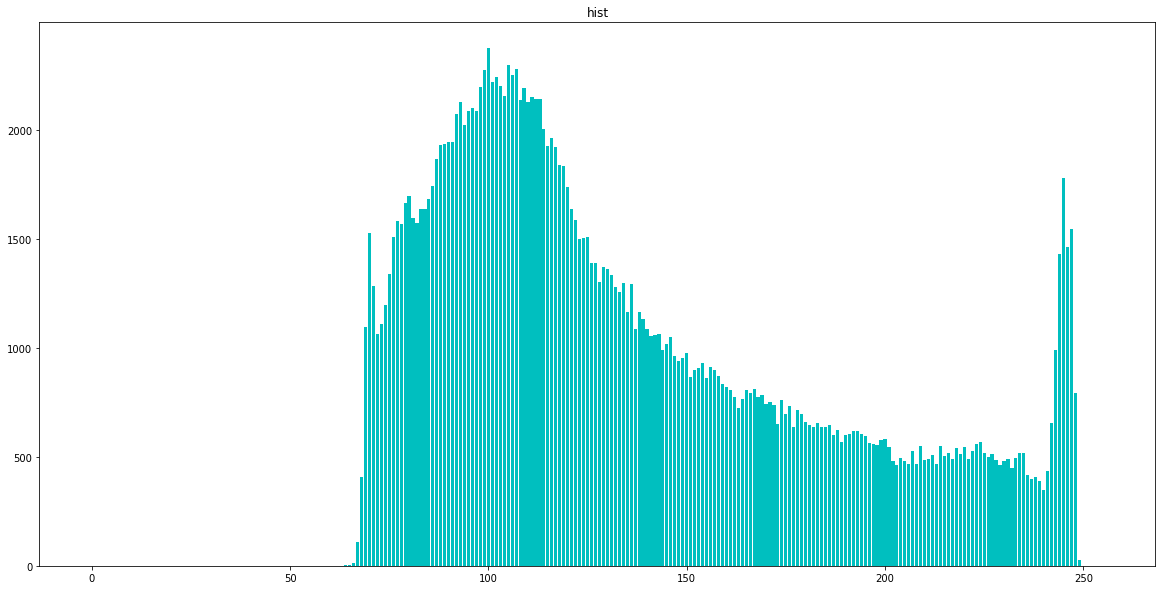

In [25]:
img = cv2.imread(os.path.join('images', 'img1.jpg'), cv2.IMREAD_GRAYSCALE)
h = compute_histogram(img)
show_histogram(h, 'hist', 'q3a')

# PART 3B

Here is for your helper functions(optional)

in this cell you should implement histogram visualization. please don't use opencv methods:

**Explanation:** Here I calculated the transition for Histogram Equalization and then applied the transition to the original photo

In [26]:
def histogram_equalization(image):
    '''
    Equalizes the histogram of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image that it's histogram be eqaulized.   
    '''
    
    h = compute_histogram(image)
    out_image = image.copy()

    ####### your code ########
    n_pixel = image.shape[0] * image.shape[1]
    transition = np.round(255 * h.cumsum() / n_pixel)
    
    out_image = transition[out_image]
    ##########################
    return out_image  

Test your implementation (dont change this cell)

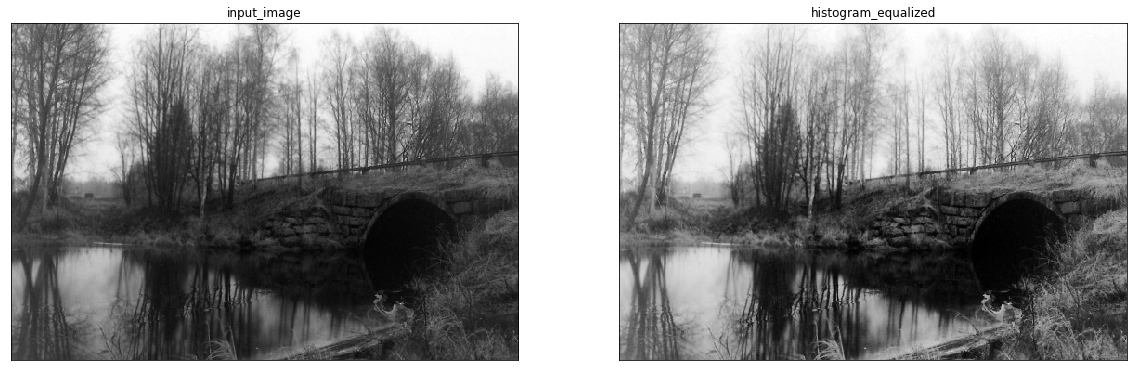

[[206. 194. 197. ... 250. 250. 248.]
 [208. 207. 202. ... 250. 248. 248.]
 [212. 206. 186. ... 252. 252. 250.]
 ...
 [127. 129. 125. ... 108. 106. 103.]
 [127. 129. 127. ... 111. 108. 103.]
 [123. 125. 125. ... 118. 121. 123.]]


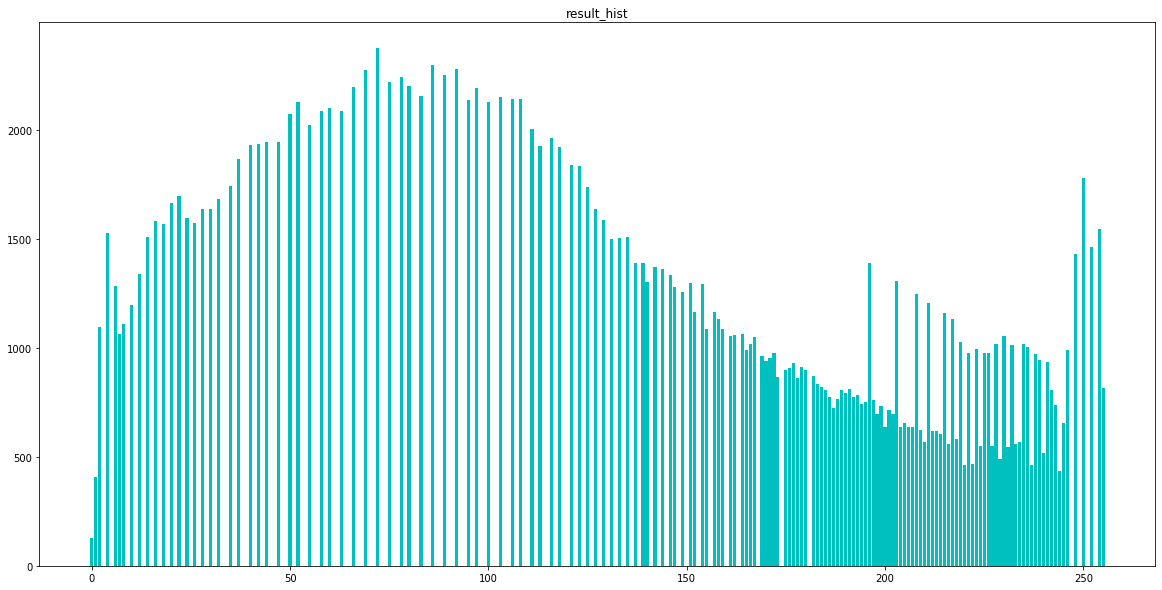

In [27]:
img = cv2.imread(os.path.join('images', 'img1.jpg'), cv2.IMREAD_GRAYSCALE)
out = histogram_equalization(img)
image_list = []
image_list.append([img, 'input_image'])
image_list.append([out, 'histogram_equalized'])
plotter(image_list, 1, 2, True, 20, 10, 'q3b-1')
print(out)
h2 = compute_histogram(out)
show_histogram(h2, 'result_hist', 'q3b-2')

**Result Explanation:** Here as we can see, the contrast of the photo is significantly increased and a lot more details are shown in the image after applying the histogram equalization method.
As plotted above, The histogram itself now is in a wider range of color intensities compared to the histogram before applying the equalization.

# PART 3C

Here is for your helper functions(optional)

in this cell you should implement histogram stretching. please don't use opencv methods

**Explanation:** Here I applied Histogram Stretching algorithm on an input image using normalization method.

In [39]:
def histogram_stretching(image):
    '''
    Streches the histogram of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image that it's histogram be streched.   
    '''
    
    h = compute_histogram(image)
    out_image = image.copy()
    ####### your code ########
    out_image = np.matrix.astype((255 * ((out_image - image.min())/ (image.max() - image.min()))), int)
    ##########################
    return out_image

Test your implementation (dont change this cell)

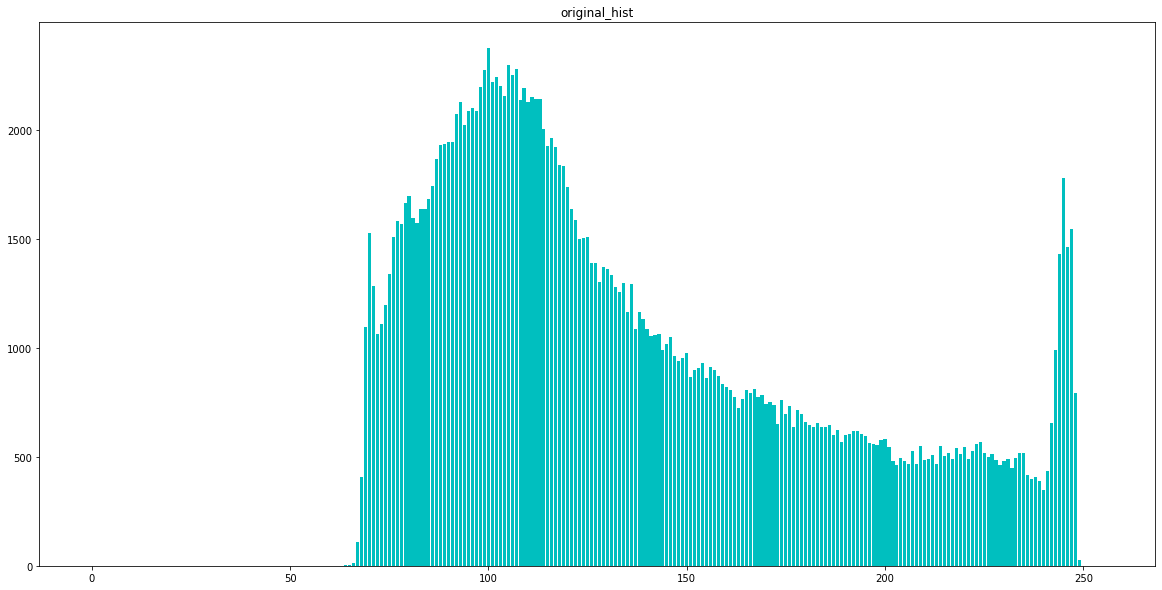

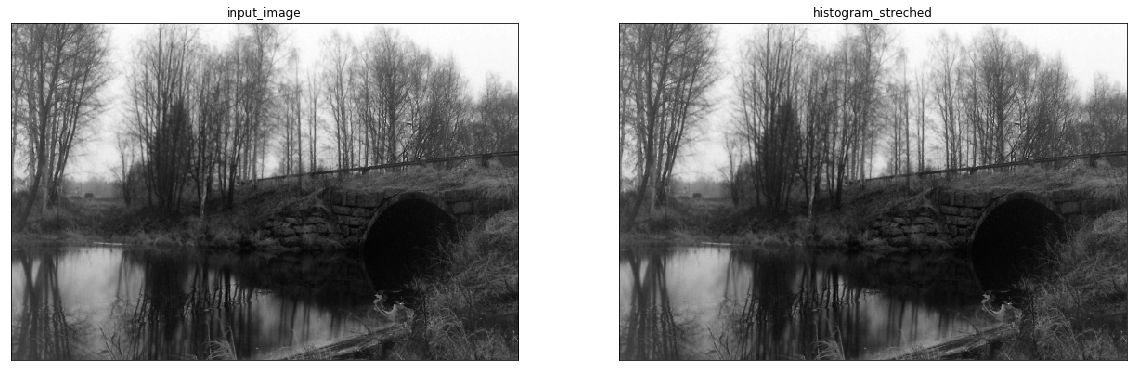

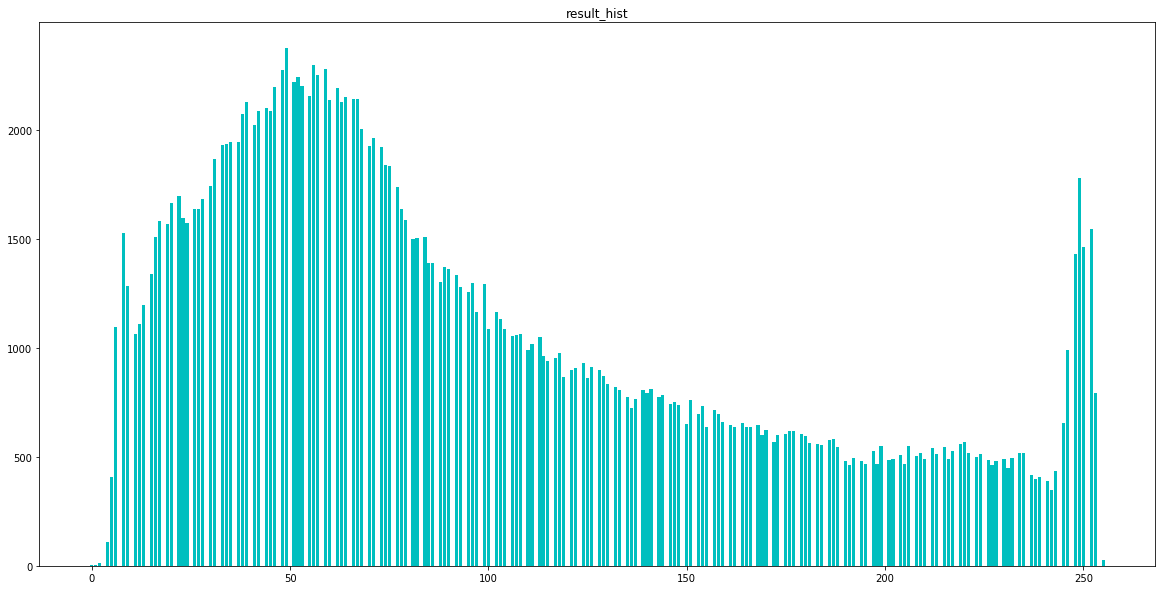

In [40]:
img = cv2.imread(os.path.join('images', 'img1.jpg'), cv2.IMREAD_GRAYSCALE)
h = compute_histogram(img)
show_histogram(h, 'original_hist', 'q3c-3')
out = histogram_stretching(img)
image_list = []
image_list.append([img, 'input_image'])
image_list.append([out, 'histogram_streched'])
plotter(image_list, 1, 2, True, 20, 10, 'q3c-1')
h2 = compute_histogram(out)
show_histogram(h2, 'result_hist', 'q3c-2')

**Result Explanation:** As we can see, the original histogram is in a narrower range of colors comparing to the stretched histogram. This is the result of the histogram stretching algorithm applied to the photo.
The contrast of the image is slightly improved but less than Equalization method.

# PART 3D

Test your implementation (dont change this cell)

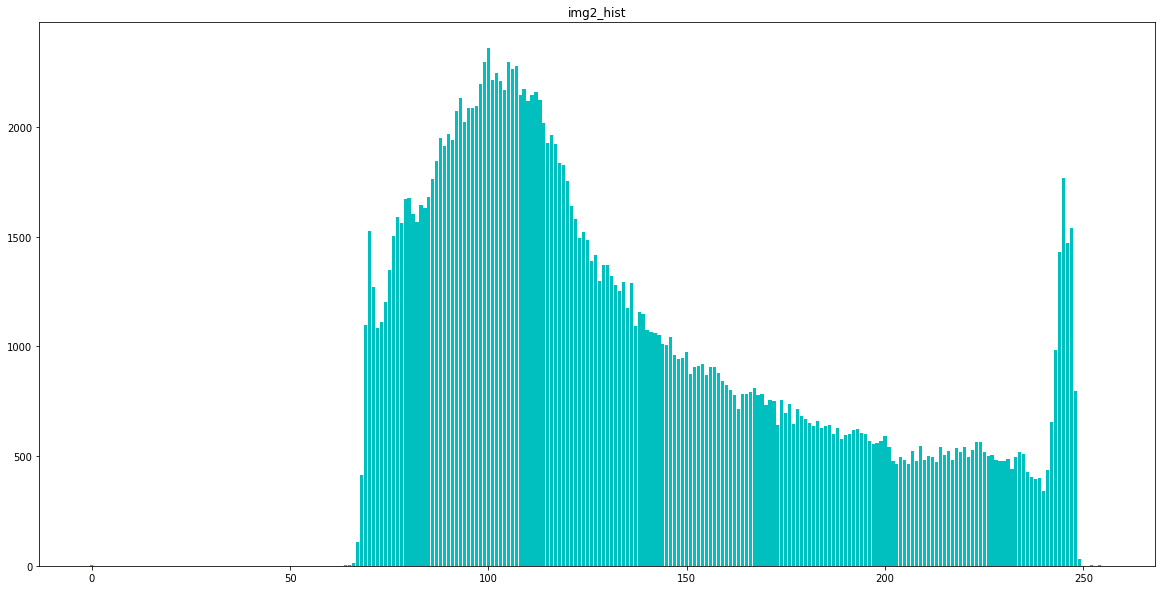

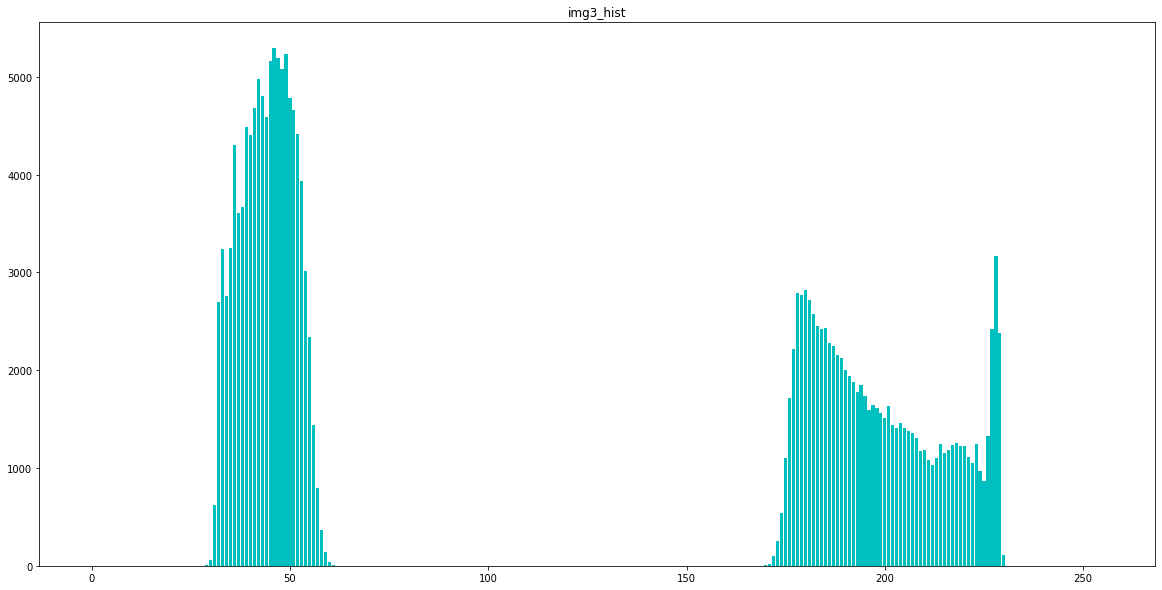

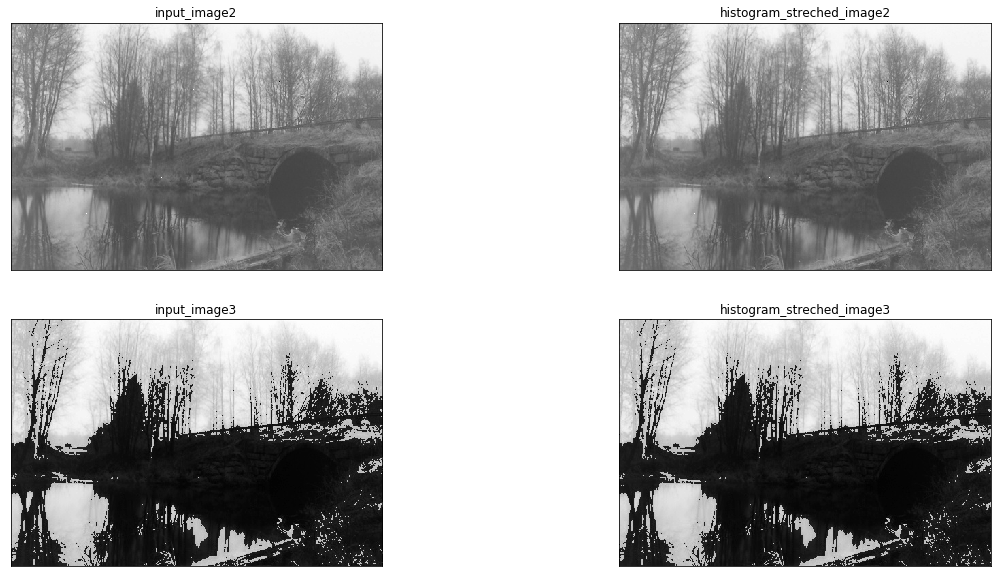

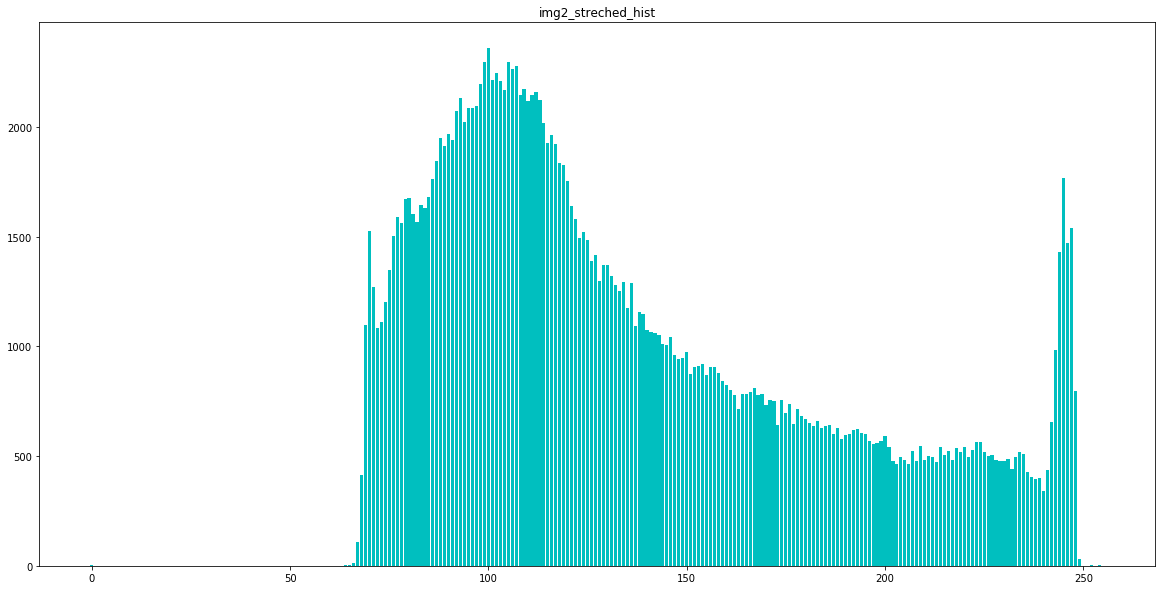

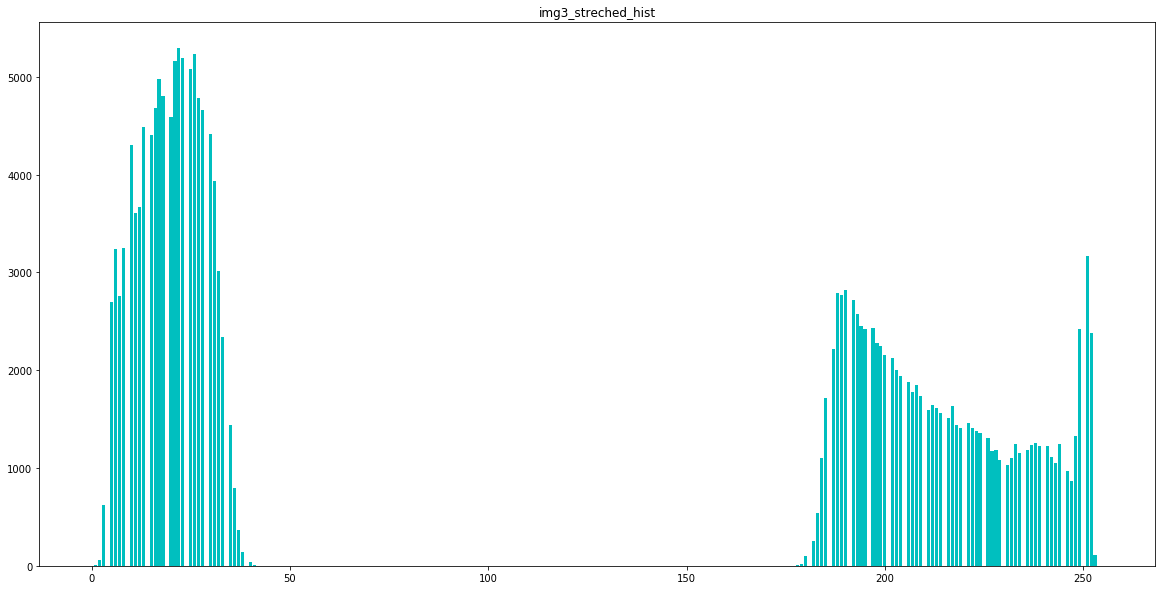

In [41]:
img2 = cv2.imread(os.path.join('images', 'img2.jpg'), cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread(os.path.join('images', 'img3.jpg'), cv2.IMREAD_GRAYSCALE)
h2 = compute_histogram(img2)
show_histogram(h2, 'img2_hist', 'q3d_img2_hist')
h3 = compute_histogram(img3)
show_histogram(h3, 'img3_hist', 'q3d_img3_hist')
out2 = histogram_stretching(img2)
out3 = histogram_stretching(img3)
image_list = []
image_list.append([img2, 'input_image2'])
image_list.append([out2, 'histogram_streched_image2'])
image_list.append([img3, 'input_image3'])
image_list.append([out3, 'histogram_streched_image3'])
plotter(image_list, 2, 2, True, 20, 10, 'q3d')
h2_res = compute_histogram(out2)
show_histogram(h2_res, 'img2_streched_hist', 'q3d_img2_streched_hist')
h3_res = compute_histogram(out3)
show_histogram(h3_res, 'img3_streched_hist', 'q3d_img3_streched_hist')

**Result Explanation:**
 \par\textbf{- First Photo:} \par In this photo, there must be some outlier pixels that their value is near the minimum and near the maximum, so the histogram stretching can't help because the range of pixels is incorrect. We can clip the pixel range between two values and with this method we can eliminate outlier pixels and then applying the Stretching method can have better results.
 \par\textbf{- Second Photo:} \par In this case, the contrast is not confined to a single region, But two (look at the  histogram, it has two chunks), When this occurs the Stretching can't be of much use specially in this case that the two chunks are near the max and min intensities and the middle is not covered, so the histogram is already stretched and this algorithm has no effects. We can use the Histogram Equalization method to increase contrast. As shown below:

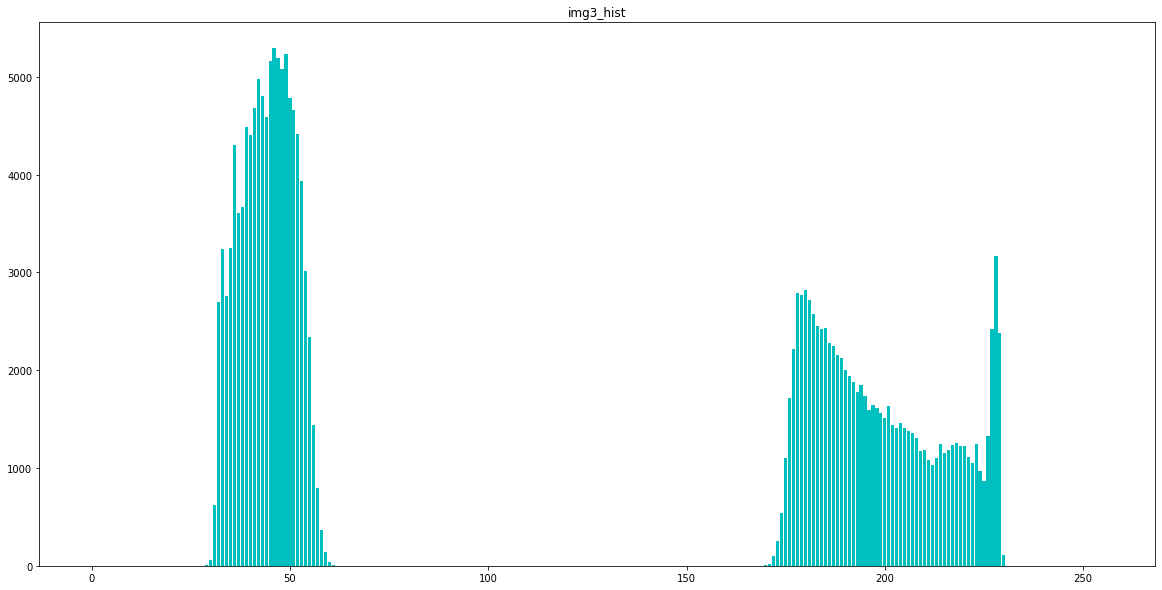

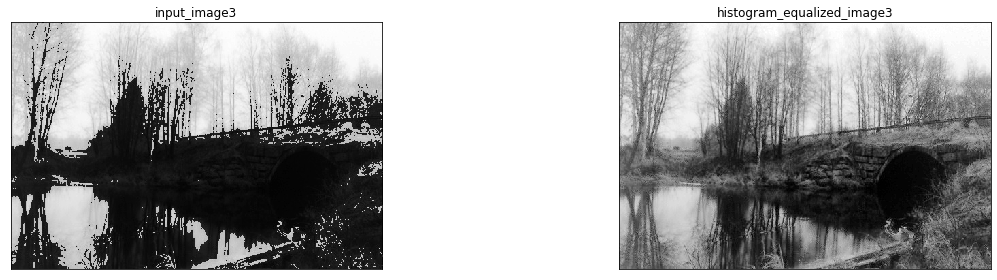

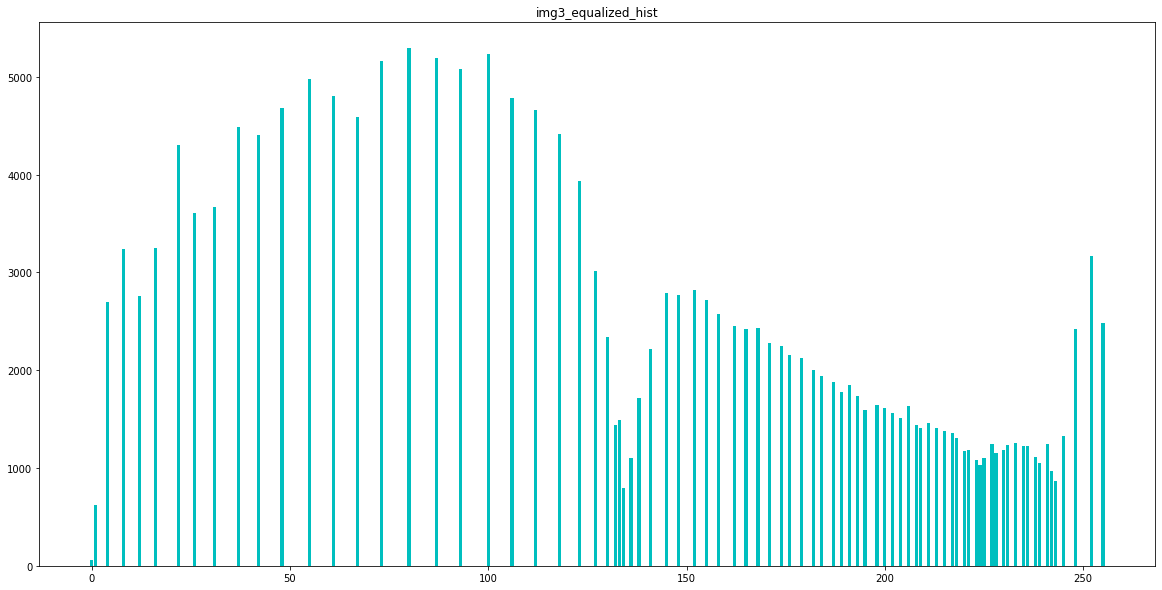

In [42]:
img3 = cv2.imread(os.path.join('images', 'img3.jpg'), cv2.IMREAD_GRAYSCALE)
h3 = compute_histogram(img3)
show_histogram(h3, 'img3_hist', 'q3d_img3_hist')
out3 = histogram_equalization(img3)
image_list = []
image_list.append([img3, 'input_image3'])
image_list.append([out3, 'histogram_equalized_image3'])
plotter(image_list, 2, 2, True, 20, 10, 'q3d')
h3_res = compute_histogram(out3)
show_histogram(h3_res, 'img3_equalized_hist', 'q3d_img3_equalized_hist')

- As seen above, when using Histogram Equalization for the second photo, the result is a lot improved and the histogram is in a standard shape

# PART 3E

Here is for your helper functions(optional)

use opencv clahe in this part

In [43]:
def clahe(image):
    '''
    Applys the OpenCV's CLAHE on the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.   
    '''
    
    out_image = image.copy()
    
    ####### your code ########
    # First creating a OpenCV CLAHE object, with contrast limiting of 2 and tiles size of (10, 10)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))
    
    # Applying the CLAHE algorithm to the image using the CLAHE object
    out_image = clahe.apply(image)
    ##########################
    
    return out_image

Test your implementation (dont change this cell)

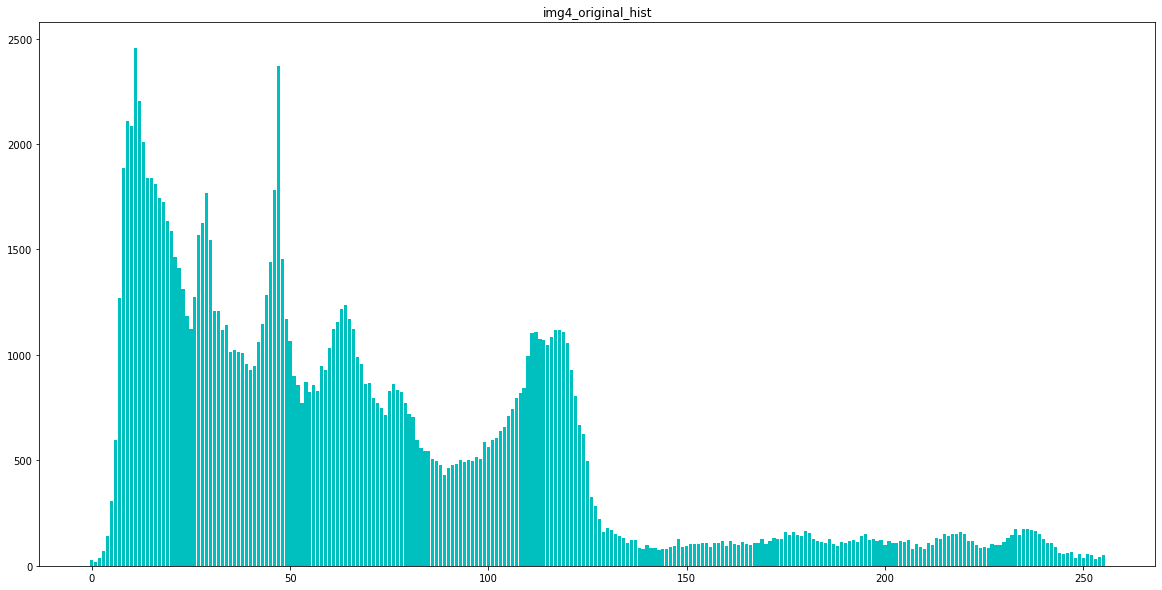

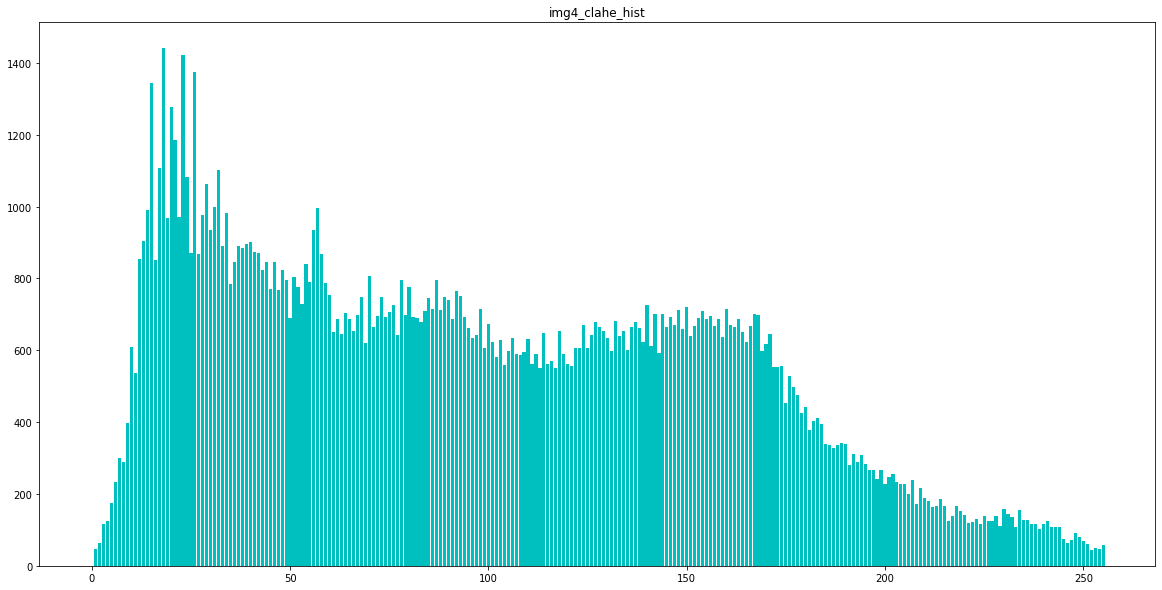

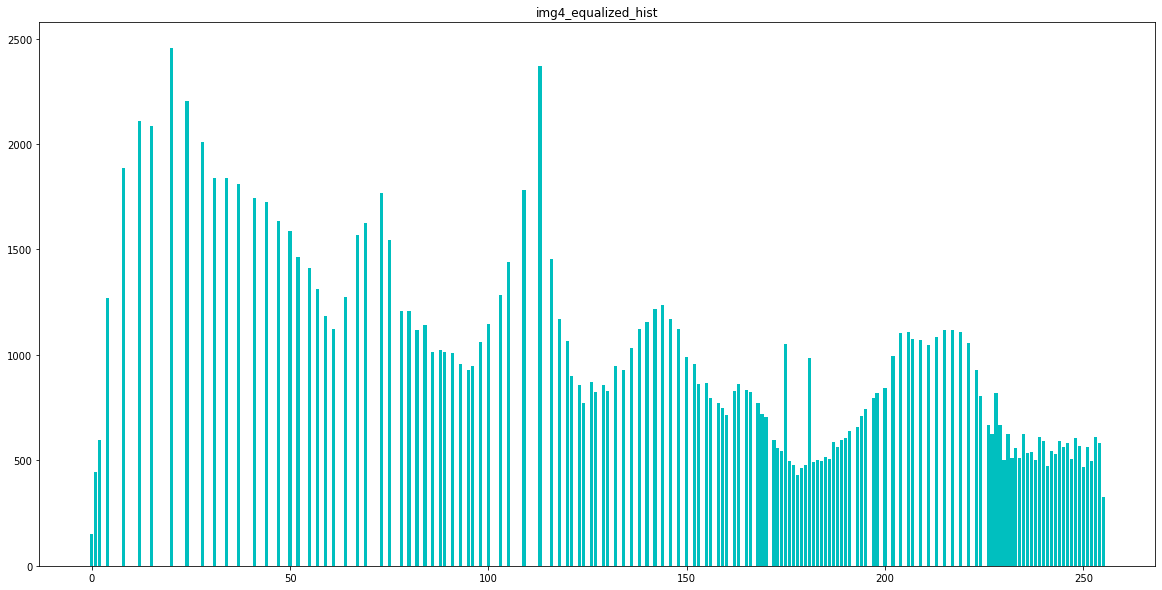

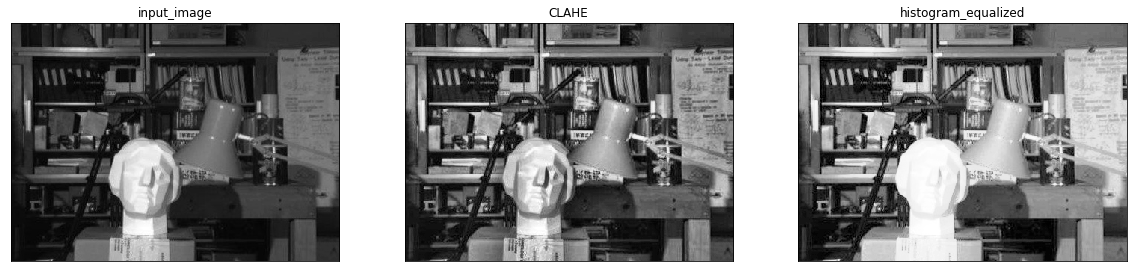

In [46]:
image = cv2.imread(os.path.join('images', 'img4.jpg'), cv2.IMREAD_GRAYSCALE)

h1 = compute_histogram(image)
show_histogram(h1, 'img4_original_hist', '')

clahed_img = clahe(image)
equlized_img = histogram_equalization(image)

h2 = compute_histogram(clahed_img)
h3 = compute_histogram(equlized_img)
show_histogram(h2, 'img4_clahe_hist', '')
show_histogram(h3, 'img4_equalized_hist', '')

image_list = []
image_list.append([image, 'input_image'])
image_list.append([clahed_img, 'CLAHE'])
image_list.append([equlized_img, 'histogram_equalized'])
plotter(image_list, 1, 3, True, 20, 10, 'q3e')


**Result Explanation:** The histogram of the photo is stretched throughout the color values, But the left side of the histogram is a more populated, meaning that the part of the image is dark. When using equalization, the whole image is transmitted and the higher color parts of the photo are further increased in color value, e.g. in face of the statue, we have overbrightness due to equalization. 
AHE (Adaptive Histogram Equalization) breaks the image into some tiles, and applies the Equalization method accordingly, so every part of the photo is equalized depending on the pixel values within. So in a small area, histogram would confine to a small region.
In CLAHE method, Contrast Limiting is used with AHE, to avoid noise amplification. If any histogram bin is above the clipLimit, these pixels are clipped and distributed uniformly to other bins before applying histogram equalization.\footnote[1]{\href{https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html}{Source}}
